# Final Project Submission

Please fill out:
* Student name: Esther Terry Munene
* Student pace: full time
* Scheduled project review date/time: march 22nd 2024
* Instructor name: MaryAnne Mwikali
* Blog post URL: N/A


# Microsoft's New Movie Studios

## 1.Introduction
 
 ## Overview of the project
 Microsoft wants to venture into the business of creating movies and do well in it.
 For this project we will use exploratory data analysis to generate insights for Microsoft's New Movie  Studios.
 ## Business Understanding
Microsoft has recognized the potential in the booming industry of original video content creation and has decided to venture into the  film production by establishing a new movie studio that will be calledMicrosoft's Movie Studios. However, due to lack of prior experience in this field, Microsoft seeks to gain a deeper understanding of the current trends and preferences that bring about success in the movie industry.

This project aims to conduct comprehensive research and analysis of the film market, focusing on identifying the genres that are performing exceptionally well at the box office. By examining box office data, audience demographics, critical reception by the audience, and how the worldwide gross and runtime of the movies, the project seeks to uncover insights into the attributes of successful movies.
## Objectives
i.  Loading datasets into pandas

ii.  Retrieving data from a DataFrame

iii.  Data preparation annd cleaning

iv.  Exploratory analysis

v.  Data visualization

## The analysis below should be able to answer the following questions:

1. What are the popular genres in the box office?
2. Does popularity affect the worldwide gross?
3. Does popularity affect the revenue?
4. Does the popularity affect the ratings?


 

## Data Understanding 
The datasets are stored in the 'zippedData' folder which were sourced from:
1. im.db.zip

(zippedData/im.db)

2. Box Office Movies

(bom.movie_gross.csv)

3. rt.movie_info.tsv

4. tmdb.movies.csv

5. tn.movie_budgets.csv



## Importing Relevant Libraries

In [159]:
# Your code here - remember to use markdown cells for comments as well!
#importing libraries
import pandas as pd
import sqlite3
import numpy as np
from datetime import datetime
import zipfile


In [160]:
# importing data visualisation tools 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Loading the data

Now is time to start working with the  movie datasets stored in the 'ZippedData' folder.





# Exploring Datasets
## Tn.movie_Budget Dataset
The Tn.movie_Budget dataset gives us information on the budget and returns.



In [161]:
movie_budget=pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budget
#Cast to numeric data type
movie_budget['production_budget'] = movie_budget['production_budget'].replace('[^.0-9]', '', regex=True).astype('float32')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].replace('[^.0-9]', '', regex=True).astype('float32')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].replace('[^.0-9]', '',regex = True).astype('float64')
movie_budget.head(5)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


In [162]:

movie_budget.shape

(5782, 6)

In [163]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float32
 4   domestic_gross     5782 non-null   float32
 5   worldwide_gross    5782 non-null   float64
dtypes: float32(2), float64(1), int64(1), object(2)
memory usage: 226.0+ KB


In [164]:
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [165]:
movie_budget.duplicated().sum()

0

In [166]:
#getting the international gross
movie_budget['international_gross'] = movie_budget['worldwide_gross'] - movie_budget['domestic_gross']
cols = list(movie_budget.columns)

movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08


In [167]:
#converting object to dateTime
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'], errors='coerce')
movie_budget['year'] = movie_budget['release_date'].dt.strftime('%Y')
movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08,2015


In [168]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5782 non-null   int64         
 1   release_date         5782 non-null   datetime64[ns]
 2   movie                5782 non-null   object        
 3   production_budget    5782 non-null   float32       
 4   domestic_gross       5782 non-null   float32       
 5   worldwide_gross      5782 non-null   float64       
 6   international_gross  5782 non-null   float64       
 7   year                 5782 non-null   object        
dtypes: datetime64[ns](1), float32(2), float64(2), int64(1), object(2)
memory usage: 316.3+ KB


Data cleaning
Filtering the data
Here we will drop the rows without the values for the domestic, international and worldwide gross.



In [169]:
movie_budget.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
5037,38,2019-04-23,Living Dark: The Story of Ted the Caver,1750000.0,0.0,0.000000e+00,0.000000e+00,2019
3975,76,2015-05-15,Pound of Flesh,7500000.0,0.0,0.000000e+00,0.000000e+00,2015
4627,28,2011-06-28,2:13,3500000.0,0.0,0.000000e+00,0.000000e+00,2011
4628,29,2013-01-29,"Batman: The Dark Knight Returns, Part 2",3500000.0,0.0,0.000000e+00,0.000000e+00,2013
3947,48,2019-06-21,Burn Your Maps,8000000.0,0.0,0.000000e+00,0.000000e+00,2019
...,...,...,...,...,...,...,...,...
33,34,2015-06-12,Jurassic World,215000000.0,652270656.0,1.648855e+09,9.965842e+08,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09,2015
42,43,1997-12-19,Titanic,200000000.0,659363968.0,2.208208e+09,1.548844e+09,1997


In [170]:
#drop all all rows without the gross values
movie_budget_drop = movie_budget[(movie_budget['domestic_gross'] == 0) & (movie_budget['worldwide_gross'] == 0)]

In [171]:
movie_budget.drop(movie_budget_drop.index, axis=0, inplace=True)
movie_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017


let's filter the years to start from 2011 in order to have relevant budgeting information.


In [172]:
#convert from object to string
movie_budget['year'] = movie_budget['year'].astype(int)

In [173]:
#drop rows which are not between the years 2015 and 2022
drop_=  movie_budget[(movie_budget['year'] <= 2014)]
movie_budget.drop(drop_.index, axis=0, inplace=True)
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 2 to 5748
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   797 non-null    int64         
 1   release_date         797 non-null    datetime64[ns]
 2   movie                797 non-null    object        
 3   production_budget    797 non-null    float32       
 4   domestic_gross       797 non-null    float32       
 5   worldwide_gross      797 non-null    float64       
 6   international_gross  797 non-null    float64       
 7   year                 797 non-null    int32         
dtypes: datetime64[ns](1), float32(2), float64(2), int32(1), int64(1), object(1)
memory usage: 46.7+ KB


In [174]:
movie_budget['year'].value_counts()

2015    242
2016    204
2017    162
2018    140
2019     49
Name: year, dtype: int64

In [175]:
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,international_gross,year
count,797.000000,797.0,797.0,7.970000e+02,7.970000e+02,797.000000
mean,50.634881,44454288.0,57354036.0,1.477667e+08,9.041263e+07,2016.435383
std,29.339221,57002492.0,98196584.0,2.607258e+08,1.710463e+08,1.255101
min,1.000000,25000.0,0.0,2.600000e+01,-1.000000e+00,2015.000000
25%,25.000000,8000000.0,3000342.0,8.200000e+06,2.053330e+06,2015.000000
50%,50.000000,22000000.0,24431472.0,4.517374e+07,1.928622e+07,2016.000000
75%,78.000000,55000000.0,63859436.0,1.594876e+08,9.237100e+07,2017.000000
max,100.000000,350000000.0,936662208.0,2.053311e+09,1.369319e+09,2019.000000


 Finding the percentage profits of the movies based on the production budget and the world wide gross.

In [176]:
movie_budget['profit/loss'] = (movie_budget['worldwide_gross'] - movie_budget['production_budget'])
movie_budget['profit/loss'] = movie_budget['profit/loss'].astype(int)      
movie_budget['profit/loss'].tail()

5701    -66201
5719    -41626
5737    114822
5744    -23453
5748    464792
Name: profit/loss, dtype: int32

In [177]:
movie_budget.shape

(797, 9)

In [178]:
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year,profit/loss
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09,2015,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018,1748134200
...,...,...,...,...,...,...,...,...,...
5701,2,2015-07-17,Dawn of the Crescent Moon,75000.0,8799.0,8.799000e+03,0.000000e+00,2015,-66201
5719,20,2015-07-31,Counting,50000.0,8374.0,8.374000e+03,0.000000e+00,2015,-41626
5737,38,2016-03-18,Krisha,30000.0,144822.0,1.448220e+05,0.000000e+00,2016,114822
5744,45,2017-01-27,Emily,27000.0,3547.0,3.547000e+03,0.000000e+00,2017,-23453



### Box Office Movie Dataset
This dataset has domestic_gross and foreign_gross information.

In [179]:
# loading the second dataset
movie_gross=pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_gross.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


### Understanding the Bom Movie Dataset


In [180]:
movie_gross.shape

(3387, 5)

In [181]:
movie_gross['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [182]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [183]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [184]:
#drop the rows without gross values
movie_gross.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
movie_gross.isna().sum()

title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Movie DB Dataset

In [185]:
tmdb_movie= pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movie.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [186]:
tmdb_movie['original_language'].value_counts().head(5)

en    23291
fr      507
es      455
ru      298
ja      265
Name: original_language, dtype: int64

In [187]:
tmdb_movie.shape

(26517, 9)

In [188]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [189]:
tmdb_movie.duplicated().sum()

1020

In [190]:
#drop all duplicate rows based on the titles columns
tmdb_movie = tmdb_movie.drop_duplicates(subset = ['title','original_title'], keep = 'first')
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24842 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          24842 non-null  object 
 1   id                 24842 non-null  int64  
 2   original_language  24842 non-null  object 
 3   original_title     24842 non-null  object 
 4   popularity         24842 non-null  float64
 5   release_date       24842 non-null  object 
 6   title              24842 non-null  object 
 7   vote_average       24842 non-null  float64
 8   vote_count         24842 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [191]:
tmdb_movie.duplicated().sum()

0

In [192]:
tmdb_movie['popularity'].max()

80.773

## Rt Reviews Dataset

In [193]:
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t',encoding='unicode_escape')
reviews.tail(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"
54423,2000,"Despite the title, Wasabi isn't so spicy.",C,rotten,NaN,0,E! Online,"September 27, 2002"
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [194]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [195]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [196]:
reviews.duplicated().sum()

9

In [197]:
reviews.dropna(axis=0, inplace = True)
reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
13,3,The anger over the injustice of the financial ...,B,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012"
15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012"
16,3,For one of the smartest films I've seen in a w...,4/5,fresh,Patrick Kolan,0,Shotgun Cinema,"September 26, 2012"
17,3,Its major problem is that it's not cinematic.,B,fresh,Dennis Schwartz,0,Ozus' World Movie Reviews,"September 25, 2012"


From the reviews dataframe it is impossible to get valid data that can be used to draw conclusion on the ratings and the reviews.

### IMDB database


In [209]:
with zipfile.ZipFile('zippedData/im.db.zip','r') as zip_ref:
    zip_ref.extractall("zippedData")

In [210]:
#connecting to the database
conn =sqlite3.connect("zippedData/im.db")

In [211]:
cur=conn.cursor()

In [212]:
#This is a special querry for finding the table names.
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Im.db has 8 tables. The movie_ratings and movie_basics are more relevant to our study as they will help gain information on the highly rated genres.

In [213]:
moviebasics = pd.read_sql_query("""SELECT * 
FROM movie_basics
;""",conn)

moviebasics.tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [214]:
movieratings = pd.read_sql_query("""SELECT * 
FROM movie_ratings
;""",conn)

movieratings.tail(10)

,movie_id,averagerating,numvotes
73846,tt9691896,6.3,21
73847,tt9708284,4.9,19
73848,tt9722952,7.0,6
73849,tt9768966,8.6,27
73850,tt9783738,7.4,7
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [215]:
ratings = pd.read_sql_query("""
SELECT primary_title, movie_id, start_year, runtime_minutes, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
LIMIT 10
;""", conn)

ratings

,primary_title,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,tt0069204,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,tt0112502,2017,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,tt0137204,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,tt0146592,2010,136.0,Drama,6.8,451
8,So Much for Justice!,tt0154039,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,tt0159369,2013,180.0,Documentary,7.6,53


In [ ]:
ratings = pd.read_sql_query("""
SELECT primary_title, movie_id, start_year, runtime_minutes, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
LIMIT 10
;""", conn)

ratings

In [216]:
movie_akas = pd.read_sql_query("""SELECT * 
FROM movie_akas
;""",conn)

movie_akas.tail(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
331693,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0
331694,tt9755806,1,Big Shark,US,None,None,None,0.0
331695,tt9755806,2,Большая Акула,RU,None,None,None,0.0
331696,tt9755806,3,Big Shark,None,None,original,None,1.0
331697,tt9827784,1,Sayonara kuchibiru,JP,None,None,None,0.0
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,None,0.0


In [217]:
#find the languages 
movie_akas['language'].unique()
movie_akas['language'].value_counts().head(10)

en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
fa       482
hi       307
yue      286
Name: language, dtype: int64

In [218]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter ='\t', encoding='unicode_escape' )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [219]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [220]:
movie_info.dropna(inplace = True)

In [221]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [222]:
movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
19,26,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes,MGM
29,41,"Ken Loach directs Sweet Sixteen, a gritty dram...",R,Drama,Ken Loach,Paul Laverty,"May 16, 2003","Oct 7, 2003",$,"201,010",106 minutes,Lions Gate Films
48,61,Death once again shows he's determined to get ...,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,"Feb 10, 2006","Jul 25, 2006",$,"54,100,000",93 minutes,New Line Cinema
61,77,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,"Jul 1, 2011","Nov 15, 2011",$,"35,565,975",99 minutes,Universal Pictures
69,87,"""Mao's Last Dancer"" is the inspiring true stor...",PG,Art House and International|Drama|Musical and ...,Bruce Beresford,Jan Sardi,"Aug 20, 2010","May 3, 2011",$,"4,806,750",117 minutes,Samuel Goldwyn Films


## Data Merging


In [223]:
#renaming the column for merging

movie_gross.rename(columns={'title':'movie'}, inplace=True)
tmdb_movie.rename(columns={'original_title':'movie'}, inplace=True)
moviebasics.rename(columns={'original_title':'movie'},inplace=True)

In [206]:
#merging the movie_budget dataframe and movie_gross 

df_budget_and_gross = movie_budget.merge(movie_gross, how = 'inner', on ='movie')

In [207]:
df_budget_and_gross.shape


(409, 13)

## Merging tmd dataframe with the moviebasics table

In [225]:
#merge tmdb_movie with movie basics to get common languages

popularity_ratings_df = tmdb_movie.merge(moviebasics, how = 'inner', on ='movie')

In [226]:
popularity_ratings_df.shape

(17891, 14)

In [227]:
final_df = pd.merge(df_budget_and_gross,popularity_ratings_df, how = 'inner', on ='movie')
final_df.head(5)

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,year_x,profit/loss,studio,...,popularity,release_date_y,title,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015,1072413963,BV,...,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
1,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018,1748134200,BV,...,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
2,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08,2017,355945209,WB,...,34.953,2017-11-17,Justice League,6.2,7510,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy"
3,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08,2015,579620923,Sony,...,30.318,2015-11-06,Spectre,6.4,6719,tt2379713,Spectre,2015,148.0,"Action,Adventure,Thriller"
4,12,2018-05-25,Solo: A Star Wars Story,275000000.0,213767520.0,3.931513e+08,1.793838e+08,2018,118151347,BV,...,29.502,2018-05-25,Solo: A Star Wars Story,6.6,3838,tt3778644,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy"


In [228]:
final_df.shape

(535, 26)

In [229]:
#finding the column names
list(final_df.columns)

['id_x',
 'release_date_x',
 'movie',
 'production_budget',
 'domestic_gross_x',
 'worldwide_gross',
 'international_gross',
 'year_x',
 'profit/loss',
 'studio',
 'domestic_gross_y',
 'foreign_gross',
 'year_y',
 'genre_ids',
 'id_y',
 'original_language',
 'popularity',
 'release_date_y',
 'title',
 'vote_average',
 'vote_count',
 'movie_id',
 'primary_title',
 'start_year',
 'runtime_minutes',
 'genres']

In [230]:
# dropping the unnecessary columns

final_df.drop(columns=['id_x', 'release_date_x', 'domestic_gross_x','year_x','domestic_gross_y', 'year_y', 'genre_ids', 'id_y', 'release_date_y','movie_id','primary_title','start_year'],inplace= True)
final_df.head(5)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
0,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,en,44.383,Avengers: Age of Ultron,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
1,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",en,80.773,Avengers: Infinity War,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
2,Justice League,300000000.0,6.559452e+08,4.269209e+08,355945209,WB,428900000,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"
3,Spectre,300000000.0,8.796209e+08,6.795467e+08,579620923,Sony,680600000,en,30.318,Spectre,6.4,6719,148.0,"Action,Adventure,Thriller"
4,Solo: A Star Wars Story,275000000.0,3.931513e+08,1.793838e+08,118151347,BV,179200000,en,29.502,Solo: A Star Wars Story,6.6,3838,135.0,"Action,Adventure,Fantasy"


In this final_df we can see that English is the common language so let's drop this column.

In [231]:
final_df.drop(columns=['title','original_language'],inplace=True)
final_df.head(5)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,popularity,vote_average,vote_count,runtime_minutes,genres
0,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,44.383,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
1,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
2,Justice League,300000000.0,6.559452e+08,4.269209e+08,355945209,WB,428900000,34.953,6.2,7510,120.0,"Action,Adventure,Fantasy"
3,Spectre,300000000.0,8.796209e+08,6.795467e+08,579620923,Sony,680600000,30.318,6.4,6719,148.0,"Action,Adventure,Thriller"
4,Solo: A Star Wars Story,275000000.0,3.931513e+08,1.793838e+08,118151347,BV,179200000,29.502,6.6,3838,135.0,"Action,Adventure,Fantasy"


In [232]:
final_df.nunique()

movie                  388
production_budget      117
worldwide_gross        388
international_gross    388
profit/loss            388
studio                  40
foreign_gross          347
popularity             379
vote_average            43
vote_count             372
runtime_minutes        102
genres                 135
dtype: int64

In [233]:
# checking for null values

final_df.isna().sum()

movie                   0
production_budget       0
worldwide_gross         0
international_gross     0
profit/loss             0
studio                  0
foreign_gross           0
popularity              0
vote_average            0
vote_count              0
runtime_minutes        33
genres                  6
dtype: int64

In [234]:
# checking for duplicates

final_df.duplicated(['movie']).sum()

147

In [235]:
#drop duplicates
final_df.drop_duplicates(subset= ['movie'] ,inplace=True)
final_df.shape

(388, 12)

In [236]:
final_df.isna().sum()

movie                  0
production_budget      0
worldwide_gross        0
international_gross    0
profit/loss            0
studio                 0
foreign_gross          0
popularity             0
vote_average           0
vote_count             0
runtime_minutes        8
genres                 2
dtype: int64

Drop the two rows with null values in the genres column.


In [237]:
final_df.dropna(subset = ['genres'],inplace=True)
final_df.isna().sum()

movie                  0
production_budget      0
worldwide_gross        0
international_gross    0
profit/loss            0
studio                 0
foreign_gross          0
popularity             0
vote_average           0
vote_count             0
runtime_minutes        6
genres                 0
dtype: int64

In [238]:
# Exporting this combined dataframe to a csv

final_df.to_csv('Cleaned Microsoft Data.csv')

## Explolatory Data Analysis (EDA)

What is the most popular genre in the box office?

In [240]:
popular = final_df.sort_values('popularity', ascending = False)


In [241]:
# accessing the individual genre element per row

top_genres = [genre.split(',') for genre in popular['genres']]

top_genres

[['Action', 'Adventure', 'Sci-Fi'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Biography', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Animation'],
 ['Biography', 'Comedy', 'Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Comedy'],
 ['Biography', 'Drama'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Comedy', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Action', 'Crime', '

In [242]:
# accessing all genre elements in the rows

top_genres_list = [genre_ for element in top_genres  for genre_ in element]

top_genres_list  

['Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Action',
 'Horror',
 'Sci-Fi',
 'Comedy',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Action',
 'Crime',
 'D

In [243]:
# get the unique genres

unique_genres = []

for genre_ in top_genres_list:
    if genre_ not in unique_genres:
        unique_genres.append(genre_)

In [244]:
# count the number of times the unique genre appeared.
#import Counter
from collections import Counter

count_1 = Counter(top_genres_list)
count_1

Counter({'Action': 129,
         'Adventure': 118,
         'Sci-Fi': 39,
         'Drama': 179,
         'Mystery': 38,
         'Family': 21,
         'Fantasy': 34,
         'Comedy': 135,
         'Biography': 47,
         'Music': 10,
         'Animation': 35,
         'Crime': 55,
         'Horror': 44,
         'Thriller': 57,
         'Romance': 34,
         'Documentary': 5,
         'History': 22,
         'Sport': 6,
         'Musical': 1,
         'War': 1})

In [245]:
# separating the genres and the count

genre = []
count = []

for key, values in count_1.items():
    genre.append(key)
    count.append(values)

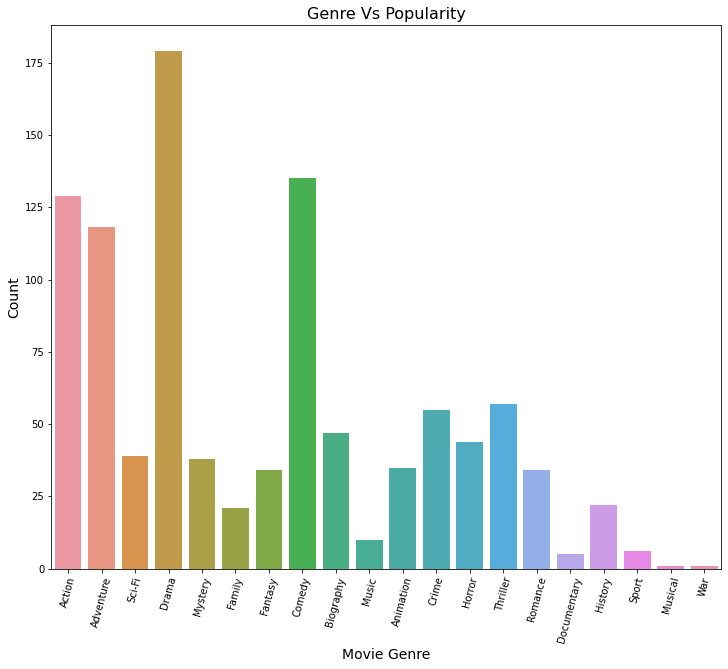

In [246]:
# plotting the data above


fig, ax = plt.subplots(figsize=(12,10))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Genre Vs Popularity', fontsize=16)
ax.set_xlabel("Movie Genre",fontsize=14)
ax.set_ylabel("Count", fontsize=14);

ax.set_xticklabels(labels = x, rotation = 75)
fig.savefig('Genres Vs Popularity.png');

The bar graph shows the number of movies by genre. The x-axis lists 18 movie genres, including Action, Adventure, Sci-Fi, Drama, and Comedy. The y-axis shows the number of movies, with a scale going from 0 to 175.

The most popular genre, according to this graph, is Drama with over 175 movies. Musical and War are the least popular genres, with less than 25 movies each.
The bar graph above shows that Drama is the most popular genre in the Movie industry as it has the tallest bar.


## Does popularity affect the worldwide gross?

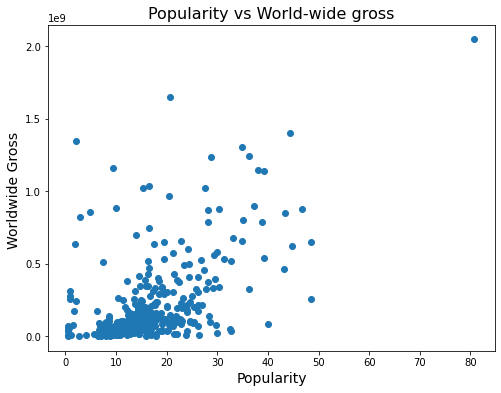

In [247]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['popularity']
y = final_df['worldwide_gross']

ax.scatter(x,y)

ax.set_title('Popularity vs World-wide gross', fontsize=16)
ax.set_xlabel("Popularity",fontsize=14)
ax.set_ylabel("Worldwide Gross ", fontsize=14)
fig.savefig('Popularity vs Worldwide gross.png');

The scatterplot above shows that an average positive correlation between popularity and Worldwide Gross. as popularity increases so does Worldwide Gross.

## Does rating affect revenue?

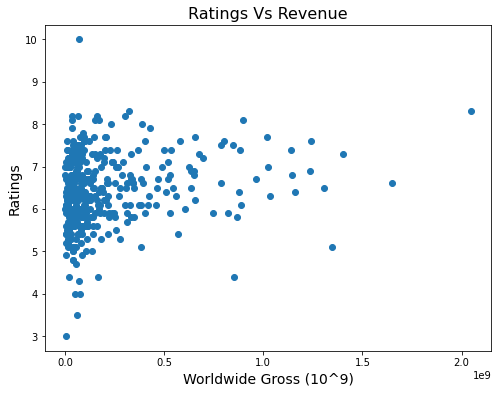

In [248]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['worldwide_gross']
y = final_df['vote_average']

ax.scatter(x,y)

ax.set_title('Ratings Vs Revenue', fontsize=16)
ax.set_ylabel("Ratings",fontsize=14)
ax.set_xlabel("Worldwide Gross (10^9)", fontsize=14)
fig.savefig('Ratings vs Revenue.png');

The scatter plot above shows that there weak positive correlation between ratings and revenue since as ratings increases the worldwide gross increases but there are quite spread out and do not cluster as much.

## Does the popularity  affect the ratings?


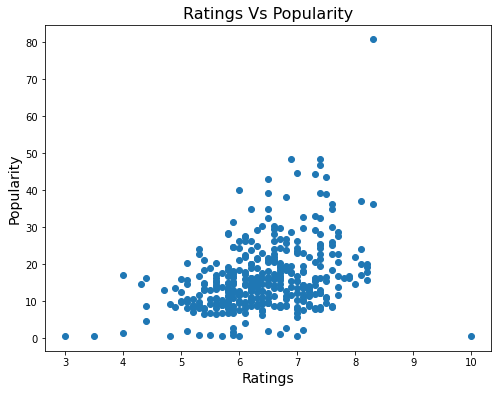

In [250]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))



x = final_df['vote_average']
y = final_df['popularity']

ax.scatter(x,y)

ax.set_title('Ratings Vs Popularity', fontsize=16)
ax.set_xlabel("Ratings",fontsize=14)
ax.set_ylabel("Popularity", fontsize=14)
fig.savefig('Ratings vs Popularity.png');

The above scatter plot shows that there is a weak positive correlation between ratings and popularity.